In [1]:
from prody import *
from pylab import *
from prody import calcDynamicCouplingIndex

In [2]:
ances = parsePDB('7pw1')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 7pw1 downloaded (7pw1.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2657 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> Secondary structures were assigned to 207 residues.


In [3]:
selection = ances.select('resnum 1 to 292')
ances_ca = selection.select('name CA')

In [4]:
gnm = GNM('ances')
gnm.buildKirchhoff(ances_ca)
gnm.calcModes(n_modes='all')

@> Kirchhoff was built in 0.04s.
@> 287 modes were calculated in 0.21s.


In [5]:
catalytic_residues = ances.select('resnum 109 133 273')

In [6]:
atoms = ances_ca
select = 'resid 1 : 292'
func_sel = catalytic_residues

In [7]:
dci = calcDynamicCouplingIndex(gnm, atoms, select, func_sel)

In [8]:
absolute_dci = abs(dci)

print(absolute_dci)


[2.69844152e+12 3.56912468e+12 4.10757590e+12 5.01397974e+12
 5.64013815e+12 8.43493663e+12 1.25063199e+13 1.53407984e+13
 2.34354700e+13 2.87882033e+13 4.04070737e+13 4.44241508e+13
 5.96654301e+13 5.59021185e+13 4.07090513e+13 4.48936783e+13
 3.61831272e+13 3.63247189e+13 2.43640411e+13 2.05101175e+13
 1.49095678e+13 1.90353921e+13 1.64614743e+13 2.16585159e+13
 2.13308680e+13 2.70855434e+13 3.86292022e+13 3.61828196e+13
 2.14956237e+13 1.74752423e+13 3.89376161e+12 3.63191855e+13
 2.90584299e+13 8.90893186e+13 7.54463773e+13 3.84960738e+12
 5.43781837e+12 9.52436928e+12 8.48244522e+12 5.19996392e+12
 4.99661431e+12 6.83971949e+11 1.85379158e+12 9.38689041e+11
 2.36277798e+12 3.92967531e+12 5.02517697e+12 1.55020699e+12
 8.97406512e+12 1.25935617e+13 1.52772253e+13 1.77125395e+13
 2.07474638e+13 2.14117333e+13 1.73491041e+13 1.87094380e+13
 9.66190186e+12 1.97248310e+13 1.64979876e+13 2.70559481e+13
 5.36933296e+13 5.38570534e+13 2.42662375e+13 1.84231405e+13
 2.50301613e+13 3.206001

In [ ]:
import numpy as np

np.save('absolute_dci.npy', absolute_dci)
loaded_array = np.load('absolute_dci.npy')
print(loaded_array)


In [27]:
dci_cutoff = np.percentile(absolute_dci, 100)
 
dci_residues = [residue for residue, value in zip(ances_ca.getResnames(), absolute_dci)if value < dci_cutoff]

resnames_and_nums = list(zip(ances_ca.getResnames(), ances_ca.getResnums()))


dci_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, absolute_dci) if value < dci_cutoff]

In [28]:
with open('dci.npy', 'wb')as f:
    ...:     np.save(f, absolute_dci)

In [29]:
print(dci)

[-2.69844152e+12 -3.56912468e+12 -4.10757590e+12 -5.01397974e+12
 -5.64013815e+12 -8.43493663e+12 -1.25063199e+13 -1.53407984e+13
 -2.34354700e+13 -2.87882033e+13 -4.04070737e+13 -4.44241508e+13
 -5.96654301e+13 -5.59021185e+13 -4.07090513e+13 -4.48936783e+13
 -3.61831272e+13 -3.63247189e+13 -2.43640411e+13 -2.05101175e+13
 -1.49095678e+13 -1.90353921e+13 -1.64614743e+13 -2.16585159e+13
 -2.13308680e+13 -2.70855434e+13 -3.86292022e+13 -3.61828196e+13
 -2.14956237e+13 -1.74752423e+13  3.89376161e+12  3.63191855e+13
  2.90584299e+13  8.90893186e+13  7.54463773e+13  3.84960738e+12
  5.43781837e+12 -9.52436928e+12 -8.48244522e+12 -5.19996392e+12
  4.99661431e+12  6.83971949e+11 -1.85379158e+12  9.38689041e+11
  2.36277798e+12 -3.92967531e+12 -5.02517697e+12 -1.55020699e+12
 -8.97406512e+12 -1.25935617e+13 -1.52772253e+13 -1.77125395e+13
 -2.07474638e+13 -2.14117333e+13 -1.73491041e+13 -1.87094380e+13
 -9.66190186e+12 -1.97248310e+13 -1.64979876e+13 -2.70559481e+13
 -5.36933296e+13 -5.38570

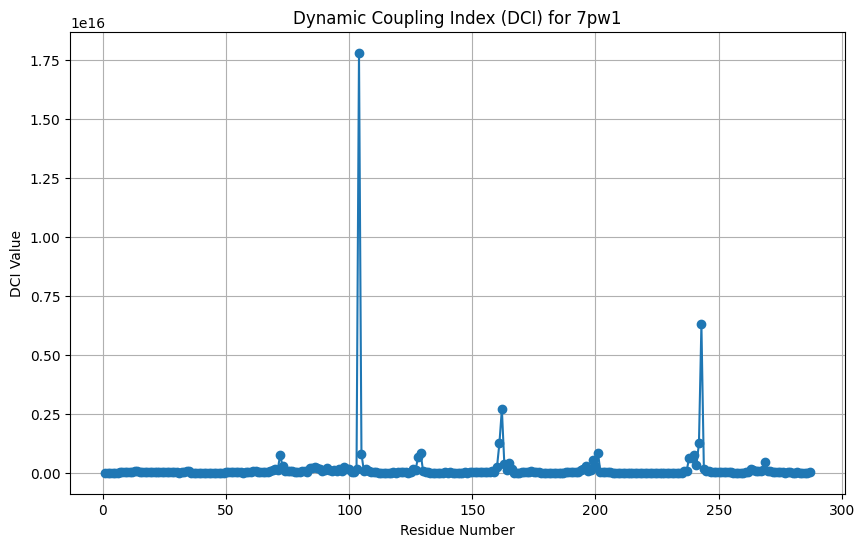

In [30]:
import numpy as np
    ...: import matplotlib.pyplot as plt
    ...: 
    ...: 
    ...: dci_values = np.load('dci.npy')
    ...: 
  
    ...: residues = np.arange(1, len(dci_values) + 1)
    ...: 
    ...: 
    ...: plt.figure(figsize=(10, 6))
    ...: plt.plot(residues, dci_values, marker='o')
    ...: plt.xlabel('Residue Number')
    ...: plt.ylabel('DCI Value')
    ...: plt.title('Dynamic Coupling Index (DCI) for 7pw1')
    ...: plt.grid(True)
    ...: plt.show()

IndexError: index 287 is out of bounds for axis 0 with size 287

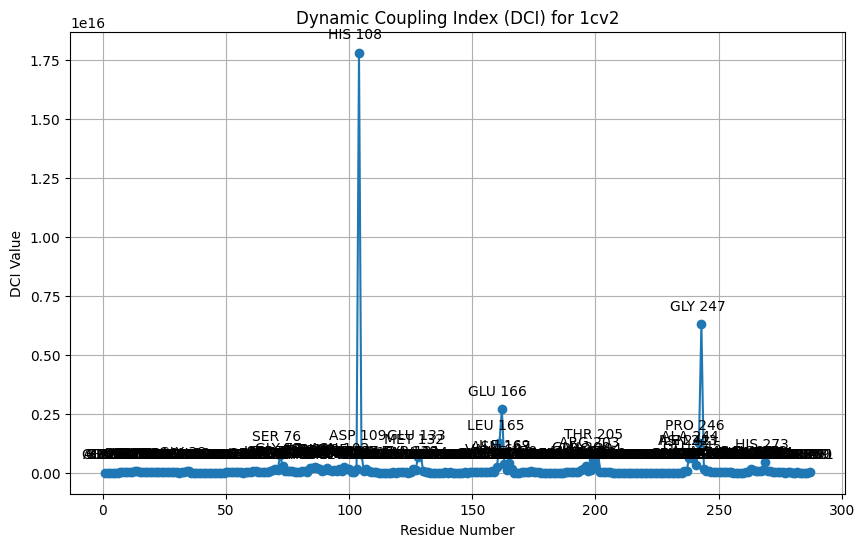

In [31]:
import numpy as np
import matplotlib.pyplot as plt


dci_values = np.load('dci.npy')



plt.figure(figsize=(10, 6))
plt.plot(residues, dci_values, marker='o')
plt.xlabel('Residue Number')
plt.ylabel('DCI Value')
plt.title('Dynamic Coupling Index (DCI) for 1cv2')
plt.grid(True)


for i, (name, number) in enumerate(resnames_and_nums):
    plt.annotate(f'{name} {number}', (number, dci_values[i]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


dci_values = np.load('dci.npy')

residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}

fig, ax = plt.subplots(figsize=(12, 10), dpi=100)

x_values = np.arange(5, 5 + len(absolute_dci))

ax.plot(x_values, absolute_dci, marker='o', linestyle='-')

subset_color = 'red'

for i, value_tuple in enumerate(resnames_and_nums):
    if absolute_dci[i] > 0.5e16:
        
        value = value_tuple[0]
      
        one_letter_code = residue_mapping.get(value.upper(), "?")
        
        label = f"{one_letter_code} {i+5}"
        ax.annotate(label, (i+5, absolute_dci[i]), textcoords="offset points", xytext=(2,10), ha='center', fontsize=16)
        ax.plot(i+5, absolute_dci[i], marker='o', linestyle='', color=subset_color)


grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+5, max(x)+300, 15))



ax.set_xlabel('Residue Number', fontsize=14)
ax.set_ylabel('DCI Value', fontsize=14)
ax.set_title('Dynamic Coupling Index (DCI) for Ancestor', fontsize=14)

plt.show()


In [32]:
dci_cutoff = np.percentile(absolute_dci, 100) 
 
dci_residues = [residue for residue, value in zip(ances_ca.getResnames(), absolute_dci)if value < dci_cutoff]

resnames_and_nums = list(zip(ances_ca.getResnames(), ances_ca.getResnums()))


dci_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, absolute_dci) if value < dci_cutoff]

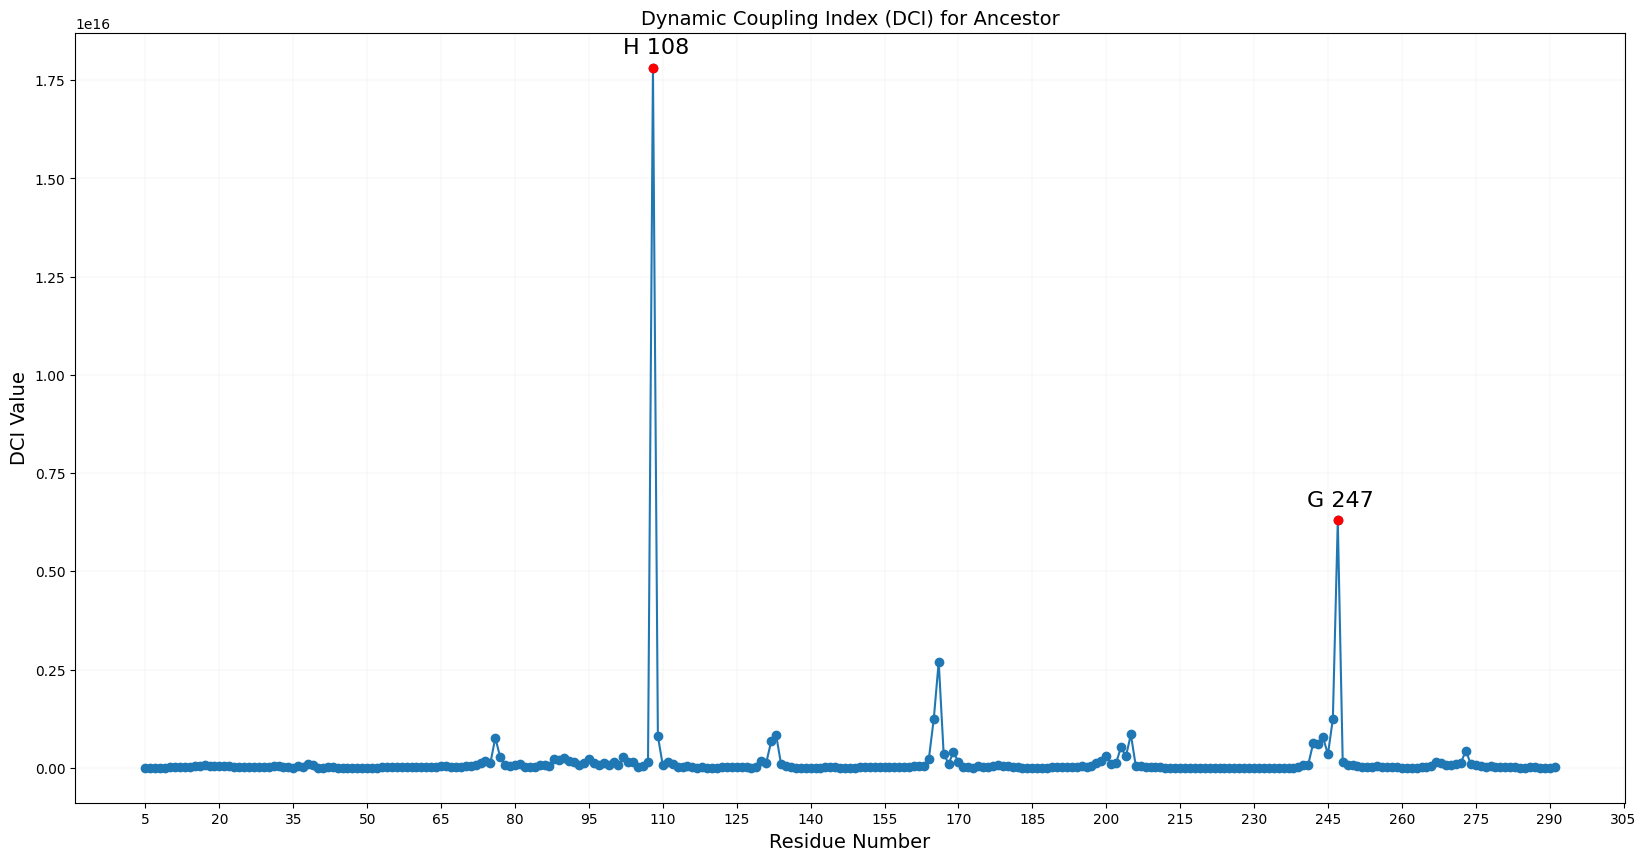

In [35]:
import matplotlib.pyplot as plt
import numpy as np


dci_values = np.load('dci.npy')

residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}



fig, ax = plt.subplots(figsize=(20, 10), dpi=100)

x_values = np.arange(5, 5 + len(absolute_dci))

ax.plot(x_values, absolute_dci, marker='o', linestyle='-')

subset_color = 'red'

min_length = min(len(resnames_and_nums), len(absolute_dci))

for i in range(min_length):
    if absolute_dci[i] > 0.3e16:
     
        value = resnames_and_nums[i][0]
        
        one_letter_code = residue_mapping.get(value.upper(), "?")
       
        label = f"{one_letter_code} {i+5}"
        ax.annotate(label, (i+5, absolute_dci[i]), textcoords="offset points", xytext=(2,10), ha='center', fontsize=16)
        ax.plot(i+5, absolute_dci[i], marker='o', linestyle='', color=subset_color)


grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+5, max(x)+300, 15))



ax.set_xlabel('Residue Number', fontsize=14)
ax.set_ylabel('DCI Value', fontsize=14)
ax.set_title('Dynamic Coupling Index (DCI) for Ancestor', fontsize=14)

plt.show()
